# Data filtering in signal processing

> Marcos Duarte, Renato Naville Watanabe  
> [Laboratory of Biomechanics and Motor Control](https://bmclab.pesquisa.ufabc.edu.br)  
> Federal University of ABC, Brazil

Here will see an introduction to data filtering and the most basic filters typically used in signal processing of biomechanical data.  
You should be familiar with the [basic properties of signals](http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/SignalBasicProperties.ipynb) before proceeding.

## Setup

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML, display
# scipy and numpy have too many future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Filter and smoothing

In data acquisition with an instrument, it's common that the noise has higher frequencies and lower amplitudes than the desired signal. To remove this noise from the signal, a procedure known as filtering or smoothing is employed in the signal processing.  
<a href="http://en.wikipedia.org/wiki/Filter_(signal_processing)">Filtering</a> is a process to attenuate from a signal some unwanted component or feature. A filter usually removes certain frequency components from the data according to its frequency response.  
[Frequency response](http://en.wikipedia.org/wiki/Frequency_response) is the quantitative measure of the output spectrum of a system or device in response to a stimulus, and is used to characterize the dynamics of the system.  
[Smoothing](http://en.wikipedia.org/wiki/Smoothing) is the process of removal of local (at short scale) fluctuations in the data while preserving a more global pattern in the data (such local variations could be noise or just a short scale phenomenon that is not interesting). A filter with a low-pass frequency response performs smoothing.  
With respect to the filter implementation, it can be classified as [analog filter](http://en.wikipedia.org/wiki/Passive_analogue_filter_development) or [digital filter](http://en.wikipedia.org/wiki/Digital_filter).  
An analog filter is an electronic circuit that performs filtering of the input electrical signal (analog data) and outputs a filtered electrical signal (analog data). A simple analog filter can be implemented with a electronic circuit with a resistor and a capacitor. A digital filter, is  a system that implement the filtering of a digital data (time-discrete data).

### Example: the moving-average filter

An example of a low-pass (smoothing) filter is the moving average, which is performed taking the arithmetic mean of subsequences of $m$ terms of the data. For instance, the moving averages with window sizes (m) equal to 2 and 3 are:

$$ \begin{array}{}
&y_{MA(2)} = \frac{1}{2}[x_1+x_2,\; x_2+x_3,\; \cdots,\; x_{n-1}+x_n] \\
&y_{MA(3)} = \frac{1}{3}[x_1+x_2+x_3,\; x_2+x_3+x_4,\; \cdots,\; x_{n-2}+x_{n-1}+x_n]
\end{array} $$

Which has the general formula:

$$ y[i] = \sum_{j=0}^{m-1} x[i+j] \quad for \quad i=1, \; \dots, \; n-m+1 $$

Where $n$ is the number (length) of data.

Let's implement a simple version of the moving average filter.  
First, let's import the necessary Python libraries and configure the environment:

A naive moving-average function definition:

In [2]:
def moving_average(x, window):
    """Moving average of 'x' with window size 'window'."""
    y = np.empty(len(x)-window+1)
    for i in range(len(y)):
        y[i] = np.sum(x[i:i+window])/window
    return y

Let's generate some data to test this function:

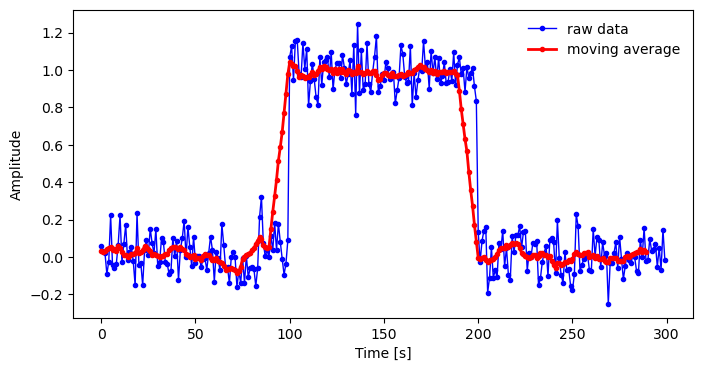

In [3]:
signal = np.zeros(300)
signal[100:200] += 1
noise = np.random.randn(300)/10
x = signal + noise
window = 11

y = moving_average(x, window)

# plot
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(x, 'b.-', linewidth=1, label = 'raw data')
ax.plot(y, 'r.-', linewidth=2, label = 'moving average')
ax.legend(frameon=False, loc='upper right', fontsize=10)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Amplitude")
plt.show()

Later we will look on better ways to calculate the moving average.

## Digital filters

In signal processing, a digital filter is a system that performs mathematical operations on a signal to modify certain aspects of that signal. A digital filter (in fact, a causal, linear time-invariant (LTI) digital filter) can be seen as the implementation of the following difference equation in the time domain:

$$ \begin{array}{}
y_n &= \quad b_0x_n + \; b_1x_{n-1} + \cdots + b_Mx_{n-M} - \; a_1y_{n-1} - \cdots - a_Ny_{n-N} \\ 
& = \quad \sum_{k=0}^M b_kx_{n-k} - \sum_{k=1}^N a_ky_{n-k}
\end{array} $$

Where the output $y$ is the filtered version of the input $x$, $a_k$ and $b_k$ are the filter coefficients (real values), and the order of the filter is the larger of N or M. 

This general equation is for a recursive filter where the filtered signal y is calculated based on current and previous values of $x$ and on previous values of $y$ (the own output values, because of this it is said to be a system with feedback). A filter that does not re-use its outputs as an input (and it is said to be a system with only feedforward) is called nonrecursive filter (the $a$ coefficients of the equation are zero). Recursive and nonrecursive filters are also known as infinite impulse response (IIR) and finite impulse response (FIR) filters, respectively.  

A filter with only the terms based on the previous values of $y$ is also known as an autoregressive (AR) filter. A filter with only the terms based on the current and previous values of $x$ is also known as an moving-average (MA) filter. The filter with all terms is also known as an autoregressive moving-average (ARMA) filter. The moving-average filter can be implemented by making $n$ $b$ coefficients each equals to $1/n$ and the $a$ coefficients equal to zero in the difference equation.  

### Transfer function 

Another form to characterize a digital filter is by its [transfer function](http://en.wikipedia.org/wiki/Transfer_function). In simple terms, a transfer function is the ratio in the frequency domain between the input and output signals of a filter.  
For continuous-time input signal $x(t)$ and output $y(t)$, the transfer function $H(s)$ is given by the ratio between the [Laplace transforms](http://en.wikipedia.org/wiki/Laplace_transform) of input $x(t)$ and output $y(t)$:

$$ H(s) = \frac{Y(s)}{X(s)} $$

Where $s = \sigma + j\omega$; $j$ is the imaginary unit and $\omega$ is the angular frequency, $2\pi f$.  

In the steady-state response case, we can consider $\sigma=0$ and the Laplace transforms with complex arguments reduce to the [Fourier transforms](http://en.wikipedia.org/wiki/Fourier_transform) with real argument $\omega$.

For discrete-time input signal $x(t)$ and output $y(t)$, the transfer function $H(z)$ will be given by the ratio between the [z-transforms](http://en.wikipedia.org/wiki/Z-transform) of input $x(t)$ and output $y(t)$, and the formalism is similar.

The transfer function of a digital filter (in fact for a linear, time-invariant, and causal filter), obtained by taking the z-transform of the difference equation shown earlier, is given by:

$$ H(z) = \frac{Y(z)}{X(z)} = \frac{b_0 + b_1 z^{-1} + b_2 z^{-2} + \cdots + b_N z^{-N}}{1 + a_1 z^{-1} + a_2 z^{-2} + \cdots + a_M z^{-M}} $$

$$ H(z) = \frac{\sum_{k=0}^M b_kz^{-k}}{1 + \sum_{k=1}^N a_kz^{-k}} $$

And the order of the filter is the larger of N or M.  

Similar to the difference equation, this transfer function is for a recursive (IIR) filter. If the $a$ coefficients are zero, the denominator is equal to one, and the filter becomes nonrecursive (FIR).

### The Fourier transform

The [Fourier transform](http://en.wikipedia.org/wiki/Fourier_transform) is a mathematical operation to transform a signal which is function of time, $g(t)$, into a signal which is function of frequency, $G(f)$, and it is defined by:  
<br />
$$ \mathcal{F}[g(t)] = G(f) = \int_{-\infty}^{\infty} g(t) e^{-j 2\pi f t} dt $$  

Its inverse operation is:  
<br />
$$ \mathcal{F}^{-1}[G(f)] = g(t) = \int_{-\infty}^{\infty} G(f) e^{j 2\pi f t} df $$  

The function $G(f)$ is the representation in the frequency domain of the time-domain signal, $g(t)$, and vice-versa. The functions $g(t)$ and $G(f)$ are referred to as a Fourier integral pair, or Fourier transform pair, or simply the Fourier pair. [See this text for an introduction to Fourier transform](http://www.thefouriertransform.com/transform/fourier.php).

## Types of filters

In relation to the frequencies that are not removed from the data (and a boundary is specified by the critical or cutoff frequency), a filter can be a low-pass, high-pass, band-pass, and band-stop. The frequency response of such filters is illustrated in the next figure.

<div class='center-align'><figure><img src="http://upload.wikimedia.org/wikipedia/en/thumb/e/ec/Bandform_template.svg/640px-Bandform_template.svg.png" alt="Filters" /><figcaption><i>Frequency response of filters (<a href="http://en.wikipedia.org/wiki/Filter_(signal_processing)" target="_blank">from Wikipedia</a>).</i></figcaption></figure></div>

The critical or cutoff frequency for a filter is defined as the frequency where the power (the amplitude squared) of the filtered signal is half of the power of the input signal (or the output amplitude is 0.707 of the input amplitude).  
For instance, if a low-pass filter has a cutoff frequency of 10 Hz, it means that at 10 Hz the power of the filtered signal is 50% of the power of the original signal (and the output amplitude will be about 71% of the input amplitude). 

The gain of a filter (the ratio between the output and input powers) is usually expressed in the decibel (dB) unit.

### Decibel (dB) 

The <a href="http://en.wikipedia.org/wiki/Decibel" target="_blank">decibel (dB)</a> is a logarithmic unit used to express the ratio between two values.    
In the case of the filter gain measured in the decibel unit:

$$Gain=10\,log\left(\frac{A_{out}^2}{A_{in}^2}\right)=20\,log\left(\frac{A_{out}}{A_{in}}\right)$$  

Where $A_{out}$ and $A_{in}$ are respectively the amplitudes of the output (filtered) and input (raw) signals.

For instance, the critical or cutoff frequency for a filter, the frequency where the power (the amplitude squared) of the filtered signal is half of the power of the input signal, is given in decibel as:

$$ 10\,log\left(0.5\right) \approx -3 dB $$  

If the power of the filtered signal is twice the power of the input signal, because of the logarithm, the gain in decibel is $10\,log\left(2\right) \approx 3 dB$.  
If the output power is attenuated by ten times, the gain is $10\,log\left(0.1\right) \approx -10 dB$, but if the output amplitude is attenuated by ten times, the gain is $20\,log\left(0.1\right) \approx -20 dB$, and if the output amplitude is amplified by ten times, the gain is $20 dB$.  
For each 10-fold variation in the amplitude ratio, there is an increase (or decrease) of $20 dB$.

The decibel unit is useful to represent large variations in a measurement, for example, $-120 dB$ represents an attenuation of 1,000,000 times.  
A decibel is one tenth of a bel, a unit named in honor of <a href="http://en.wikipedia.org/wiki/Alexander_Graham_Bell" target="_blank">Alexander Graham Bell</a>.

### Butterworth filter

A common filter employed in biomechanics and motor control fields is the [Butterworth filter](http://en.wikipedia.org/wiki/Butterworth_filter). This filter is used because its simple design,  it has a more flat frequency response and linear phase response in the pass and stop bands, and it is simple to use.    
The Butterworth filter is a recursive filter (IIR) and both $a$ and $b$ filter coefficients are used in its implementation.   
Let's implement the Butterworth filter. We will use the function `butter` to calculate the filter coefficients:  
```python
butter(N, Wn, btype='low', analog=False, output='ba')
```
Where `N` is the order of the filter, `Wn` is the cutoff frequency specified as a fraction of the [Nyquist frequency](http://en.wikipedia.org/wiki/Nyquist_frequency) (half of the sampling frequency), and `btype` is the type of filter (it can be any of {'lowpass', 'highpass', 'bandpass', 'bandstop'}, the default is 'lowpass'). See the help of `butter` for more details. The filtering itself is performed with the function `lfilter`:   
```python
lfilter(b, a, x, axis=-1, zi=None)
```
Where `b` and `a` are the Butterworth coefficients calculated with the function `butter` and `x` is the variable with the data to be filtered.

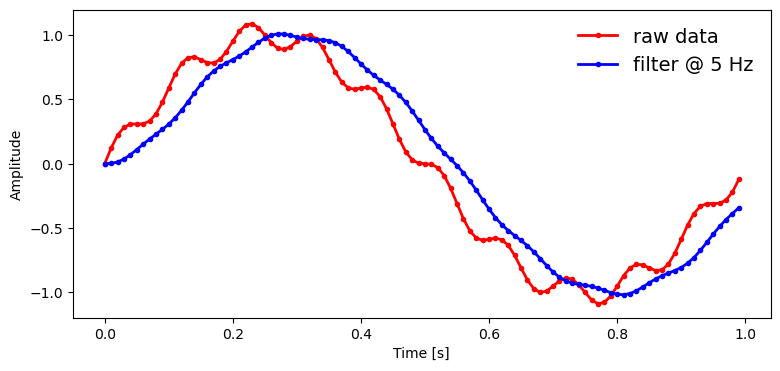

In [4]:
from scipy import signal

freq = 100
t = np.arange(0, 1, .01)
w = 2*np.pi*1  # 1 Hz
y = np.sin(w*t) + 0.1*np.sin(10*w*t)
# Butterworth filter
b, a = signal.butter(2, 5/(freq/2), btype = 'low')
y2 = signal.lfilter(b, a, y)  # standard filter
# plot
fig, ax1 = plt.subplots(1, 1, figsize=(9, 4))
ax1.plot(t,  y, 'r.-', linewidth=2, label = 'raw data')
ax1.plot(t, y2, 'b.-', linewidth=2, label = 'filter @ 5 Hz')
ax1.legend(frameon=False, fontsize=14)
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Amplitude")
plt.show()

The plot above shows that the Butterworth filter introduces a phase (a delay or lag in time) between the raw and the filtered signals. We will see how to account for that later.  

Let's look at the values of the `b` and `a` Butterworth filter coefficients for different orders and see a characteristic of them; from the general difference equation shown earlier, it follows that the sum of the `b` coefficients minus the sum of the `a` coefficients (excluding the first coefficient of `a`) is one:

In [5]:
from scipy import signal
print('Low-pass Butterworth filter coefficients')
b, a = signal.butter(1, .1, btype = 'low')
print('Order 1:', '\nb:', b, '\na:', a, '\nsum(b)-sum(a):', np.sum(b)-np.sum(a[1:]))
b, a = signal.butter(2, .1, btype = 'low')
print('Order 2:', '\nb:', b, '\na:', a, '\nsum(b)-sum(a):', np.sum(b)-np.sum(a[1:]))

Low-pass Butterworth filter coefficients
Order 1: 
b: [0.13672874 0.13672874] 
a: [ 1.         -0.72654253] 
sum(b)-sum(a): 1.0
Order 2: 
b: [0.02008337 0.04016673 0.02008337] 
a: [ 1.         -1.56101808  0.64135154] 
sum(b)-sum(a): 1.0


### Bode plot

How much the amplitude of the filtered signal is attenuated in relation to the amplitude of the raw signal (gain or magnitude) as a function of frequency is given in the frequency response plot. The plots of the frequency and phase responses (the [bode plot](http://en.wikipedia.org/wiki/Bode_plot)) of this filter implementation (Butterworth, lowpass at 5 Hz, second-order) is shown below:

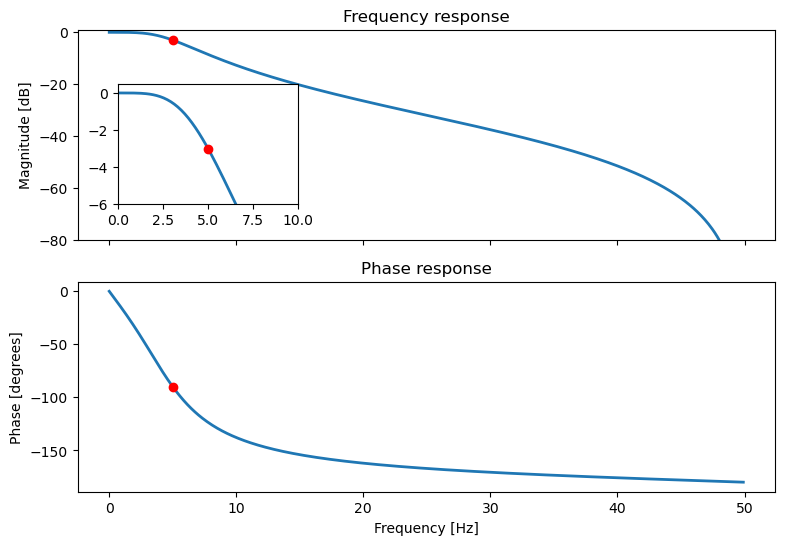

In [6]:
from scipy import signal

b, a = signal.butter(2, 5/(freq/2), btype = 'low')
w, h = signal.freqz(b, a)  # compute the frequency response of a digital filter
angles = np.rad2deg(np.unwrap(np.angle(h)))  # angle of the complex argument
w = w/np.pi*freq/2  # angular frequency from radians to Hz
h = 20*np.log10(np.absolute(h))  # in decibels

fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(9, 6))
ax1.plot(w, h, linewidth=2)
ax1.set_ylim(-80, 1)
ax1.set_title('Frequency response')
ax1.set_ylabel("Magnitude [dB]")
ax1.plot(5, -3.01, 'ro')
ax11 = plt.axes([.17, .59, .2, .2])  # inset plot
ax11.plot(w, h, linewidth=2)
ax11.plot(5, -3.01, 'ro')
ax11.set_ylim([-6, .5])
ax11.set_xlim([0, 10])
ax2.plot(w, angles, linewidth=2)
ax2.set_title('Phase response')
ax2.set_xlabel("Frequency [Hz]")
ax2.set_ylabel("Phase [degrees]")
ax2.plot(5, -90, 'ro')
plt.show()

The inset plot in the former figure shows that at the cutoff frequency (5 Hz), the power of the filtered signal is indeed attenuated by 3 dB.  

The phase-response plot shows that at the cutoff frequency, the Butterworth filter presents about 90 degrees of phase between the raw and filtered signals. A 5 Hz signal has a period of 0.2 s and 90 degrees of phase corresponds to 0.05 s of lag. Looking at the plot with the raw and filtered signals employing or not the phase correction, we can see that the delay is indeed about 0.05 s.

### Order of a filter

The order of a filter is related to the inclination of the 'wall' in the frequency response plot that attenuates or not the input signal at the vicinity of the cutoff frequency. A vertical wall exactly at the cutoff frequency would be ideal but this is impossible to implement.   
A Butterworth filter of first order attenuates 6 dB of the power of the signal each doubling of the frequency (per octave) or, which is the same, attenuates 20 dB each time the frequency varies by an order of 10 (per decade). In more technical terms, one simply says that a first-order filter rolls off -6 dB per octave or that rolls off -20 dB per decade. A second-order filter rolls off -12 dB per octave (-40 dB per decade), and so on, as shown in the next figure.  

In [7]:
#!/usr/bin/env python

"""Plot of frequency response of the Butterworth filter with different orders."""

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

__author__ = 'Marcos Duarte, https://github.com/demotu/BMC'
__version__ = 'butterworth_plot.py v.1 2023/10/23'


def butterworth_plot(fig=None, ax=None):
    """
    Plot of frequency response of the Butterworth filter with different orders.
    """

    if fig is None:
        fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    b1, a1 = signal.butter(1, 10, 'low', analog=True)
    w, h1 = signal.freqs(b1, a1)
    ang1 = np.rad2deg(np.unwrap(np.angle(h1)))
    h1 = 20 * np.log10(abs(h1))
    b2, a2 = signal.butter(2, 10, 'low', analog=True)
    w, h2 = signal.freqs(b2, a2)
    ang2 = np.rad2deg(np.unwrap(np.angle(h2)))
    h2 = 20 * np.log10(abs(h2))
    b4, a4 = signal.butter(4, 10, 'low', analog=True)
    w, h4 = signal.freqs(b4, a4)
    ang4 = np.rad2deg(np.unwrap(np.angle(h4)))
    h4 = 20 * np.log10(abs(h4))
    b6, a6 = signal.butter(6, 10, 'low', analog=True)
    w, h6 = signal.freqs(b6, a6)
    ang6 = np.rad2deg(np.unwrap(np.angle(h6)))
    h6 = 20 * np.log10(abs(h6))
    w = w/10

    # PLOT
    ax[0].plot(w, h1, 'b', w, h2, 'r', w, h4, 'g', w, h6, 'y', linewidth=2)
    ax[0].axvline(1, color='black') # cutoff frequency
    ax[0].scatter(1, -3, marker='s', edgecolor='0', facecolor='1', s=400)
    #ax1.legend(('1', '2', '4', '6'), title='Filter order', loc='best')
    ax[0].set_xscale('log')
    fig.suptitle('Bode plot for low-pass Butterworth filter with different orders',
                 fontsize=16, y=1.05)
    #ax1.set_title('Magnitude', fontsize=14)
    ax[0].set_xlabel('Frequency / Critical frequency', fontsize=14)
    ax[0].set_ylabel('Magnitude [dB]', fontsize=14)
    ax[0].set_xlim(0.1, 10)
    ax[0].set_ylim(-120, 10)
    ax[0].grid(which='both', axis='both')
    ax[1].plot(w, ang1, 'b', w, ang2, 'r', w, ang4, 'g', w, ang6, 'y', linewidth=2)
    ax[1].axvline(1, color='black')  # cutoff frequency
    ax[1].legend(('1', '2', '4', '6'), title='Filter order', loc='best')
    ax[1].set_xscale('log')
    #ax2.set_title('Phase', fontsize=14)
    ax[1].set_xlabel('Frequency / Critical frequency', fontsize=14)
    ax[1].set_ylabel('Phase [degrees]', fontsize=14)
    ax[1].set_yticks(np.arange(0, -300, -45))
    ax[1].set_ylim(-300, 10)
    ax[1].grid(which='both', axis='both')
    plt.tight_layout(w_pad=1)
    axi = plt.axes([.115, .4, .15, .35])  # inset plot
    axi.plot(w, h1, 'b', w, h2, 'r', w, h4, 'g', w, h6, 'y', linewidth=2)
    #ax11.set_yticks(np.arange(0, -7, -3))
    axi.set_xticks((0.6, 1, 1.4))
    axi.set_yticks((-6, -3, 0))
    axi.set_ylim([-7, 1])
    axi.set_xlim([.5, 1.5])
    axi.grid(which='both', axis='both')

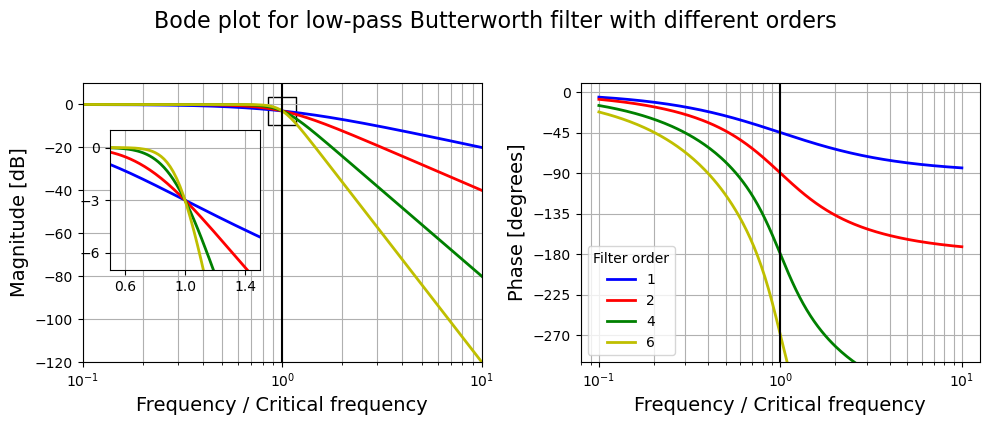

In [8]:
butterworth_plot()

### Butterworth filter with zero-phase shift

The phase introduced by the Butterworth filter can be corrected in the digital implementation by cleverly filtering the data twice, once forward and once backwards. So, the lag introduced in the first filtering is zeroed by the same lag in the opposite direction at the second pass. The result is a zero-phase shift (or zero-phase lag) filtering.  
However, because after each pass the output power at the cutoff frequency is attenuated by two, by passing twice the second order Butterworth filter, the final output power will be attenuated by four. We have to correct the actual cutoff frequency value so that when employing the two passes, the filter will attenuate only by two.  
The following formula gives the desired cutoff frequency for a second-order Butterworth filter according to the number of passes, $n$, (see Winter, 2009):

$$ C = \sqrt[4]{2^{\frac{1}{n}} - 1} $$

For instance, for two passes, $n=2$, $ C=\sqrt[4]{2^{\frac{1}{2}} - 1} \approx 0.802 $.  
The actual filter cutoff frequency will be:

$$ fc_{actual} = \frac{fc_{desired}}{C} $$

For instance, for a second-order Butterworth filter with zero-phase shift and a desired 10 Hz cutoff frequency, the actual cutoff frequency should be 12.47 Hz. 

Let's implement this forward and backward filtering using the function `filtfilt` and compare with the single-pass filtering we just did it.

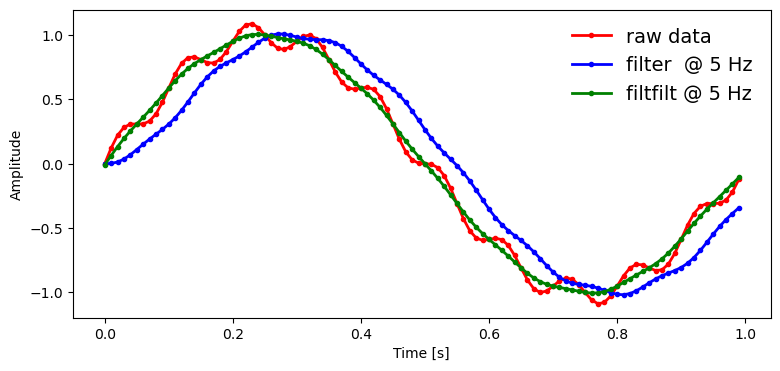

In [9]:
from scipy.signal import butter, lfilter, filtfilt
freq = 100
t = np.arange(0, 1, .01)
w = 2*np.pi*1  # 1 Hz
y = np.sin(w*t) + 0.1*np.sin(10*w*t)
# Butterworth filter
b, a = butter(2, 5/(freq/2), btype = 'low')
y2 = lfilter(b, a, y)  # standard filter
# Correct the cutoff frequency for the number of passes in the filter
C = 0.802
b, a = butter(2, (5/C)/(freq/2), btype = 'low')
y3 = filtfilt(b, a, y)  # filter with phase shift correction
# plot
fig, ax1 = plt.subplots(1, 1, figsize=(9, 4))
ax1.plot(t,  y, 'r.-', linewidth=2, label = 'raw data')
ax1.plot(t, y2, 'b.-', linewidth=2, label = 'filter  @ 5 Hz')
ax1.plot(t, y3, 'g.-', linewidth=2, label = 'filtfilt @ 5 Hz')
ax1.legend(frameon=False, fontsize=14)
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Amplitude")
plt.show()

### Critically damped digital filter

A problem with a lowpass Butterworth filter is that it tends to overshoot or undershoot data with rapid changes (see for example, Winter (2009), Robertson et at. (2013), and Robertson & Dowling (2003)).  
The Butterworth filter behaves as an underdamped second-order system and a critically damped filter doesn't have this overshoot/undershoot characteristic.   
The function `crit_damp.py` calculates the coefficients (the b's and a's) for an IIR critically damped digital filter and corrects the cutoff frequency for the number of passes of the filter. The calculation of these coefficients is very similar to the calculation for the Butterworth filter, see the `critic_damp.py` code. This function can also calculate the Butterworth coefficients if this option is chosen.  
The signature of `critic_damp.py` function is:  
```python
critic_damp(fcut, freq, npass=2, fcorr=True, filt='critic')
```
And here is an example of `critic_damp.py`: 

In [10]:
"""Coefficients of critically damped or Butterworth digital lowpass filter."""

import warnings
import numpy as np

__author__ = 'Marcos Duarte, https://github.com/demotu/BMC'
__version__ = "1.0.0"
__license__ = "MIT"


def critic_damp(fcut, freq, npass=2, fcorr=True, filt='critic'):
    """Coefficients of critically damped or Butterworthdigital lowpass filter.

    A problem with a lowpass Butterworth filter is that it tends to overshoot
    or undershoot data with rapid changes (see for example, Winter (2009),
    Robertson et at. (2013), and Robertson & Dowling (2003)).
    The Butterworth filter behaves as an underdamped second-order system and a
    critically damped filter doesn't have this overshoot/undershoot
    characteristic.

    This function calculates the coefficients (the b's and a's) for an IIR
    critically damped digital filter and corrects the cutoff frequency for
    the number of passes of the filter. The calculation of these coefficients
    is very similar to the calculation for the Butterworth filter and this
    function can also calculate the Butterworth coefficients if this option
    is chosen.

    Parameters
    ----------
    fcut : number
        desired cutoff frequency for the lowpass digital filter (Hz).
    freq : number
        sampling frequency (Hz).
    npass : number, optional (default = 2)
        number of passes the filter will be applied.
        choose 2 for a second order zero phase lag filter
    fcorr : bool, optional (default = True)
        correct (True) or not the cutoff frequency for the number of passes.
    filt : string ('critic', 'butter'), optional (default = 'critic')
        'critic' to calculate coefficients for critically damped lowpass filter
        'butter' to calculate coefficients for Butterworth lowpass filter

    Returns
    -------
    b : 1D array
        b coefficients for the filter
    a : 1D array
        a coefficients for the filter
    fc : number
        corrected cutoff frequency considering the number of passes

    Notes
    -----
    See this Jupyter notebook [1]_
    See documentation for the Scipy butter function [2]_

    References
    ----------
    .. [1] http://nbviewer.jupyter.org/github/demotu/BMC/blob/master/notebooks/DataFiltering.ipynb
    .. [2] https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.butter.html

    Examples
    --------
    >>> from critic_damp import critic_damp
    >>> print('Critically damped filter')
    >>> b_cd, a_cd, fc_cd = critic_damp(fcut=10, freq=100, npass=2, fcorr=True, filt='critic')
    >>> print('b:', b_cd, '\na:', a_cd, '\nCorrected Fc:', fc_cd)
    >>> print('Butterworth filter')
    >>> b_bw, a_bw, fc_bw = critic_damp(fcut=10, freq=100, npass=2, fcorr=True, filt='butter')
    >>> print('b:', b_bw, '\na:', a_bw, '\nCorrected Fc:', fc_bw)
    >>> # illustrate the filter in action
    >>> import numpy as np
    >>> import matplotlib.pyplot as plt
    >>> from scipy import signal
    >>> y = np.hstack((np.zeros(20), np.ones(20)))
    >>> t = np.linspace(0, 0.39, 40) - .19
    >>> y_cd = signal.filtfilt(b_cd, a_cd, y)
    >>> y_bw = signal.filtfilt(b_bw, a_bw, y)
    >>> fig, ax = plt.subplots(1, 1, figsize=(9, 4))
    >>> ax.plot(t,  y, 'k', linewidth=2, label = 'raw data')
    >>> ax.plot(t,  y_cd, 'r', linewidth=2, label = 'Critically damped')
    >>> ax.plot(t,  y_bw, 'b', linewidth=2, label = 'Butterworth')
    >>> ax.legend()
    >>> ax.set_xlabel('Time (s)')
    >>> ax.set_ylabel('Amplitude')
    >>> ax.set_title('Freq = 100 Hz, Fc = 10 Hz, 2nd order and zero-phase shift filters')
    >>> plt.show()

    """

    if fcut > freq/2:
        warnings.warn('Cutoff frequency can not be greater than Nyquist frequency.')

    # cutoff frequency correction for number of passes
    if filt.lower() == 'critic':
        if fcorr:
            corr = 1/np.power(2**(1/(2*npass))-1, 0.5)
    elif filt.lower() == 'butter':
        if fcorr:
            corr = 1/np.power(2**(1/npass)-1, 0.25)
    else:
        warnings.warn('Invalid option for paraneter filt:', filt)

    # corrected cutoff frequency
    if fcorr:
        fc = fcut*corr
        if fc > (freq/2):
            text = 'Warning: corrected cutoff frequency ({} Hz) is greater'+\
            ' than Nyquist frequency ({} Hz). Using the uncorrected cutoff'+\
            ' frequency ({} Hz).'
            print(text.format(fc, freq/2, fcut))
            fc = fcut
    else:
        fc = fcut

    # corrected angular cutoff frequency
    wc = np.tan(np.pi*fc/freq)
    # lowpass coefficients
    k1 = np.sqrt(2)*wc if filt.lower() == 'butter' else 2*wc
    k2 = wc*wc
    a0 = k2/(1+k1+k2)
    a1 = 2*a0
    a2 = k2/(1+k1+k2)
    b1 = 2*a0*(1/k2-1)
    b2 = 1-(a0+a1+a2+b1)
    # transform parameters to be consistent with SciPy butter output
    b = np.array([a0, a1, a2])
    a = np.array([1, -b1, -b2])

    return b, a, fc

Critically damped filter
b: [0.21937845 0.4387569  0.21937845] 
a: [ 1.         -0.12648588  0.00399967] 
Corrected Fc: 22.989592227534715
Butterworth filter
b: [0.09718522 0.19437045 0.09718522] 
a: [ 1.         -0.94557029  0.33431119] 
Corrected Fc: 12.465047027709272


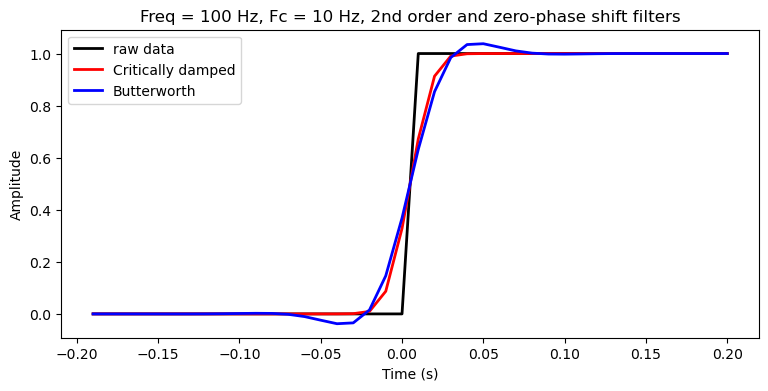

In [11]:
    >>> print('Critically damped filter')
    >>> b_cd, a_cd, fc_cd = critic_damp(fcut=10, freq=100, npass=2, fcorr=True, filt='critic')
    >>> print('b:', b_cd, '\na:', a_cd, '\nCorrected Fc:', fc_cd)
    >>> print('Butterworth filter')
    >>> b_bw, a_bw, fc_bw = critic_damp(fcut=10, freq=100, npass=2, fcorr=True, filt='butter')
    >>> print('b:', b_bw, '\na:', a_bw, '\nCorrected Fc:', fc_bw)
    >>> # illustrate the filter in action
    >>> import numpy as np
    >>> import matplotlib.pyplot as plt
    >>> from scipy import signal
    >>> y = np.hstack((np.zeros(20), np.ones(20)))
    >>> t = np.linspace(0, 0.39, 40) - .19
    >>> y_cd = signal.filtfilt(b_cd, a_cd, y)
    >>> y_bw = signal.filtfilt(b_bw, a_bw, y)
    >>> fig, ax = plt.subplots(1, 1, figsize=(9, 4))
    >>> ax.plot(t,  y, 'k', linewidth=2, label = 'raw data')
    >>> ax.plot(t,  y_cd, 'r', linewidth=2, label = 'Critically damped')
    >>> ax.plot(t,  y_bw, 'b', linewidth=2, label = 'Butterworth')   
    >>> ax.legend()
    >>> ax.set_xlabel('Time (s)')
    >>> ax.set_ylabel('Amplitude')
    >>> ax.set_title('Freq = 100 Hz, Fc = 10 Hz, 2nd order and zero-phase shift filters')
    >>> plt.show()

### Comparison of FIR filter with a critically damped filter 

In [12]:
print('Critically damped filter')
b_cd, a_cd, fc_cd = critic_damp(fcut=10, freq=100, npass=2, fcorr=True, filt='critic')
print('b:', b_cd, '\na:', a_cd, '\nCorrected Fc:', fc_cd)
print('FIR filter')
b_fir = signal.firwin(numtaps=3, cutoff=10, fs=1000)
print('b:', b_fir)
# illustrate the filter in action
y_cd = signal.filtfilt(b_cd, a_cd, y)
y_fir = signal.filtfilt(b_fir, 1, y)

Critically damped filter
b: [0.21937845 0.4387569  0.21937845] 
a: [ 1.         -0.12648588  0.00399967] 
Corrected Fc: 22.989592227534715
FIR filter
b: [0.0689264  0.86214719 0.0689264 ]


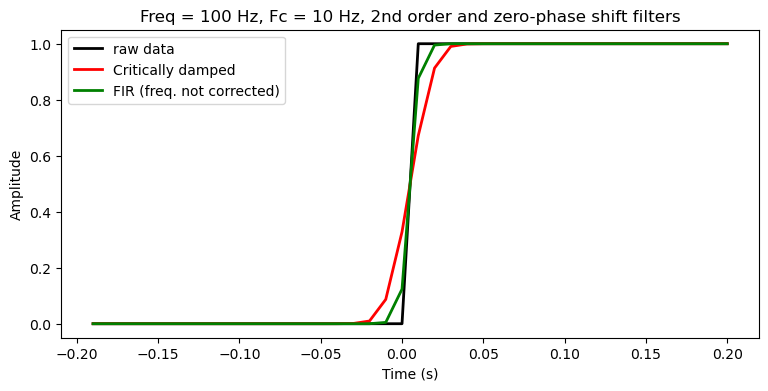

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))
ax.plot(t,  y, 'k', linewidth=2, label = 'raw data')
ax.plot(t,  y_cd, 'r', linewidth=2, label = 'Critically damped')
ax.plot(t,  y_fir, 'g', linewidth=2, label = 'FIR (freq. not corrected)')     
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.set_title('Freq = 100 Hz, Fc = 10 Hz, 2nd order and zero-phase shift filters')
plt.show()

### Moving-average filter

Here are four different versions of a function to implement the moving-average filter:

In [14]:
def moving_averageV1(x, window):
    """Moving average of 'x' with window size 'window'."""
    y = np.empty(len(x)-window+1)
    for i in range(len(y)):
        y[i] = np.sum(x[i:i+window])/window
    return y

def moving_averageV2(x, window):
    """Moving average of 'x' with window size 'window'."""
    xsum = np.cumsum(x)
    xsum[window:] = xsum[window:] - xsum[:-window]
    return xsum[window-1:]/window

def moving_averageV3(x, window):
    """Moving average of 'x' with window size 'window'."""
    return np.convolve(x, np.ones(window)/window, 'same')

from scipy.signal import lfilter

def moving_averageV4(x, window):
    """Moving average of 'x' with window size 'window'."""
    return lfilter(np.ones(window)/window, 1, x)

Let's test these versions:

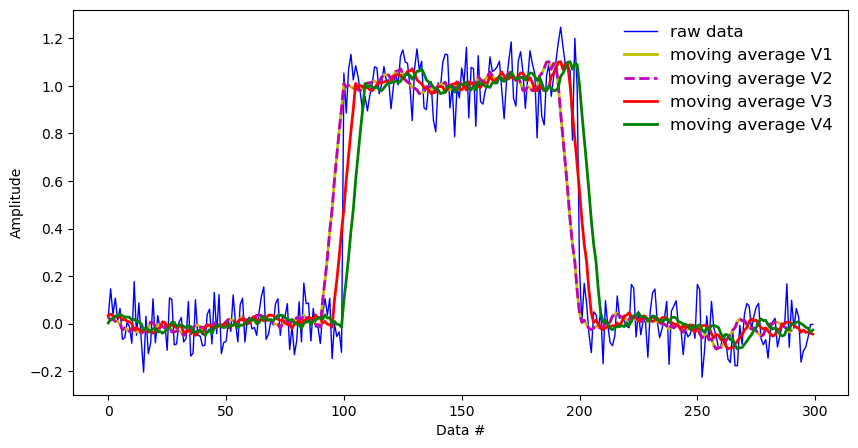

In [15]:
x = np.random.randn(300)/10
x[100:200] += 1
window = 10

y1 = moving_averageV1(x, window)
y2 = moving_averageV2(x, window)
y3 = moving_averageV3(x, window)
y4 = moving_averageV4(x, window)

# plot
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(x,  'b-',  linewidth=1, label = 'raw data')
ax.plot(y1, 'y-',  linewidth=2, label = 'moving average V1')
ax.plot(y2, 'm--', linewidth=2, label = 'moving average V2')
ax.plot(y3, 'r-',  linewidth=2, label = 'moving average V3')
ax.plot(y4, 'g-',  linewidth=2, label = 'moving average V4')
ax.legend(frameon=False, loc='upper right', fontsize=12)
ax.set_xlabel("Data #")
ax.set_ylabel("Amplitude")
plt.show()

A test of the performance of the four versions (using the magick IPython function `timeit`):

In [16]:
%timeit moving_averageV1(x, window)
%timeit moving_averageV2(x, window)
%timeit moving_averageV3(x, window)
%timeit moving_averageV4(x, window)

586 µs ± 2.82 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
5.12 µs ± 17.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
5.04 µs ± 67.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
32.7 µs ± 369 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


The version with the cumsum function produces identical results to the first version of the moving average function but it is much faster (the fastest of the four versions).  
Only the version with the convolution function produces a result without a phase or lag between the input and output data, although we could improve the other versions to account for that (for example, calculating the moving average of `x[i-window/2:i+window/2]` and using `filtfilt` instead of `lfilter`).  
And avoid as much as possible the use of loops in Python! The version with the for loop is about one hundred times slower than the other versions.

### Moving-RMS filter

The root-mean square (RMS) is a measure of the absolute amplitude of the data and it is useful when the data have positive and negative values. The RMS is defined as:

$$ RMS = \sqrt{\frac{1}{N}\sum_{i=1}^{N} x_i^2} $$

Similar to the moving-average measure, the moving RMS is defined as:

$$ y[i] = \sqrt{\sum_{j=0}^{m-1} (x[i+j])^2} \;\;\;\; for \;\;\; i=1, \; \dots, \; n-m+1 $$

Here are two implementations for a moving-RMS filter (very similar to the moving-average filter):

In [17]:
import numpy as np
from scipy.signal import filtfilt

def moving_rmsV1(x, window):
    """Moving RMS of 'x' with window size 'window'."""
    window = 2*window + 1
    return np.sqrt(np.convolve(x*x, np.ones(window)/window, 'same'))

def moving_rmsV2(x, window):
    """Moving RMS of 'x' with window size 'window'."""
    return np.sqrt(filtfilt(np.ones(window)/(window), [1], x*x))

Let's filter electromyographic data:

In [18]:
# load data file with EMG signal
data = pd.read_csv('https://raw.githubusercontent.com/BMClab/BMC/master/data/emg.csv').to_numpy()
data = data[300:1000,:]
time = data[:, 0]
data = data[:, 1] - np.mean(data[:, 1])

In [19]:
window = 50
y1 = moving_rmsV1(data, window)
y2 = moving_rmsV2(data, window)

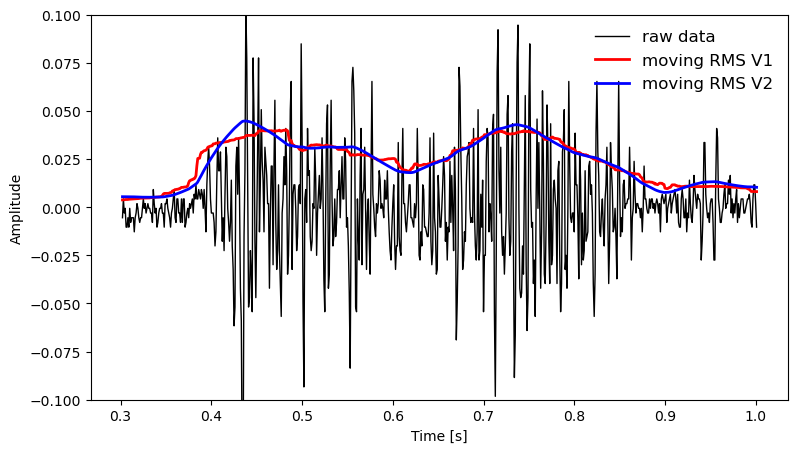

In [20]:
# plot
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
ax.plot(time, data,  'k-',  linewidth=1, label = 'raw data')
ax.plot(time, y1, 'r-',  linewidth=2, label = 'moving RMS V1')
ax.plot(time, y2, 'b-', linewidth=2, label = 'moving RMS V2')
ax.legend(frameon=False, loc='upper right', fontsize=12)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Amplitude")
ax.set_ylim(-.1, .1)
plt.show()

Similar, but not the same, results.
An advantage of the filter employing the convolution method is that it behaves better to abrupt changes in the data, such as when filtering data that change from a baseline at zero to large positive values. The filter with the `filter` or `filtfilt` function would introduce negative values in this case.  
Another advantage for the convolution method is that it is much faster:

In [21]:
print('Filter with convolution:')
%timeit moving_rmsV1(data, window)
print('Filter with filtfilt:')
%timeit moving_rmsV2(data, window)

Filter with convolution:
23.7 µs ± 252 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Filter with filtfilt:
588 µs ± 61.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Moving-median filter

The moving-median filter is similar in concept than the other moving filters but uses the median instead. This filter has a sharper response to abrupt changes in the data than the moving-average filter:

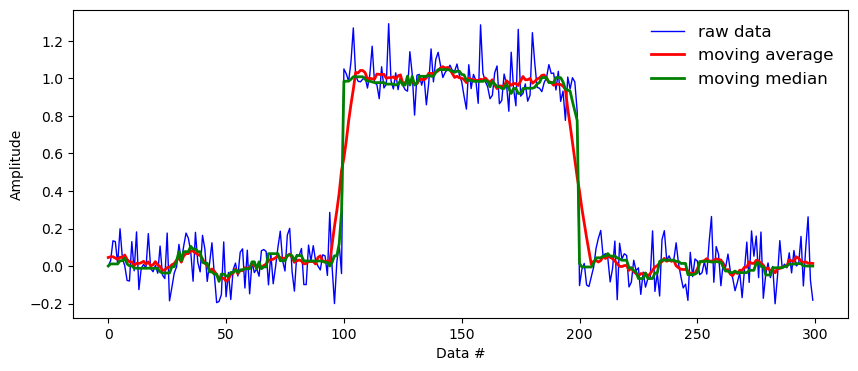

In [22]:
from scipy.signal import medfilt

x = np.random.randn(300)/10
x[100:200] += 1
window = 11

y = np.convolve(x, np.ones(window)/window, 'same')
y2 = medfilt(x, window)

# plot
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(x,  'b-',  linewidth=1, label = 'raw data')
ax.plot(y, 'r-',  linewidth=2, label = 'moving average')
ax.plot(y2, 'g-',  linewidth=2, label = 'moving median')
ax.legend(frameon=False, loc='upper right', fontsize=12)
ax.set_xlabel("Data #")
ax.set_ylabel("Amplitude")
plt.show()

### More moving filters

The library [pandas](https://pandas.pydata.org/) has several types of [moving-filter functions](https://pandas.pydata.org/pandas-docs/version/0.15/computation.html#moving-rolling-statistics-moments).

## Numerical differentiation of data with noise

How to remove noise from a signal is rarely a trivial task and this problem gets worse with numerical differentiation of the data because the amplitudes of the noise with higher frequencies than the signal are amplified with differentiation (for each differentiation step, the SNR decreases).  
To demonstrate this problem, consider the following function representing some experimental data:

$$ f = sin(\omega t) + 0.1sin(10\omega t) $$

The first component, with large amplitude (1) and small frequency (1 Hz), represents the signal and the second component, with small amplitude (0.1) and large frequency (10 Hz), represents the noise. The signal-to-noise ratio (SNR) for these data is equal to (1/0.1)$^2$ = 100. Let's see what happens with the SNR for the first and second derivatives of $f$:

$$ f\:'\:= \omega cos(\omega t) + \omega cos(10\omega t) $$

$$ f\:''= -\omega^2 sin(\omega t) - 10\omega^2 sin(10\omega t) $$

For the first derivative, SNR = 1, and for the second derivative, SNR = 0.01!   
The following plots illustrate this problem:

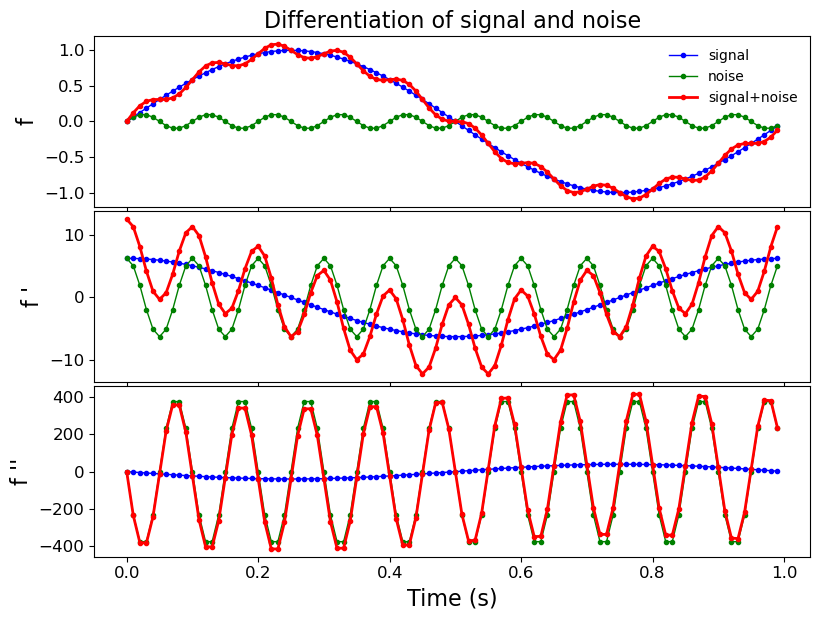

In [23]:
t = np.arange(0,1,.01)
w = 2*np.pi*1 # 1 Hz
#signal and noise derivatives:
s   = np.sin(w*t);        n = 0.1*np.sin(10*w*t)
sd  = w*np.cos(w*t);     nd = w*np.cos(10*w*t)
sdd = -w*w*np.sin(w*t); ndd = -w*w*10*np.sin(10*w*t)

plt.rc('axes',  labelsize=16,  titlesize=16) 
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12) 
fig, (ax1,ax2,ax3) = plt.subplots(3, 1, sharex = True, figsize=(8, 6))

ax1.set_title('Differentiation of signal and noise')
ax1.plot(t,         s, 'b.-', linewidth=1, label = 'signal')
ax1.plot(t,         n, 'g.-', linewidth=1, label = 'noise')
ax1.plot(t,       s+n, 'r.-', linewidth=2, label = 'signal+noise')
ax2.plot(t,        sd, 'b.-', linewidth=1)
ax2.plot(t,        nd, 'g.-', linewidth=1)
ax2.plot(t,   sd + nd, 'r.-', linewidth=2)
ax3.plot(t,       sdd, 'b.-', linewidth=1)
ax3.plot(t,       ndd, 'g.-', linewidth=1)
ax3.plot(t, sdd + ndd, 'r.-', linewidth=2)

ax1.legend(frameon=False, fontsize=10)
ax1.set_ylabel('f')
ax2.set_ylabel("f '")
ax3.set_ylabel("f ''")
ax3.set_xlabel("Time (s)")
fig.tight_layout(pad=0)
plt.show()

Let's see how the use of a low-pass Butterworth filter can attenuate the high-frequency noise and how the derivative is affected.    
We will also calculate the [Fourier transform](https://en.wikipedia.org/wiki/Fourier_transform) of these data to look at their frequencies content.

In [24]:
from scipy import signal, fftpack

freq = 100
t = np.arange(0,1,.01);
w = 2*np.pi*1 # 1 Hz
y = np.sin(w*t)+0.1*np.sin(10*w*t)
# Butterworth filter
# Correct the cutoff frequency for the number of passes in the filter
C = 0.802
b, a = signal.butter(2, (5/C)/(freq/2), btype = 'low')
y2 = signal.filtfilt(b, a, y)
# 2nd derivative of the data
ydd = np.diff(y,2)*freq*freq   # raw data
y2dd = np.diff(y2,2)*freq*freq # filtered data
# frequency content
yfft = np.abs(fftpack.fft(y))/(y.size/2)   # raw data
y2fft = np.abs(fftpack.fft(y2))/(y.size/2) # filtered data
freqs = fftpack.fftfreq(y.size, 1./freq)
yddfft = np.abs(fftpack.fft(ydd))/(ydd.size/2)
y2ddfft = np.abs(fftpack.fft(y2dd))/(ydd.size/2)
freqs2 = fftpack.fftfreq(ydd.size, 1./freq)

And the plots:

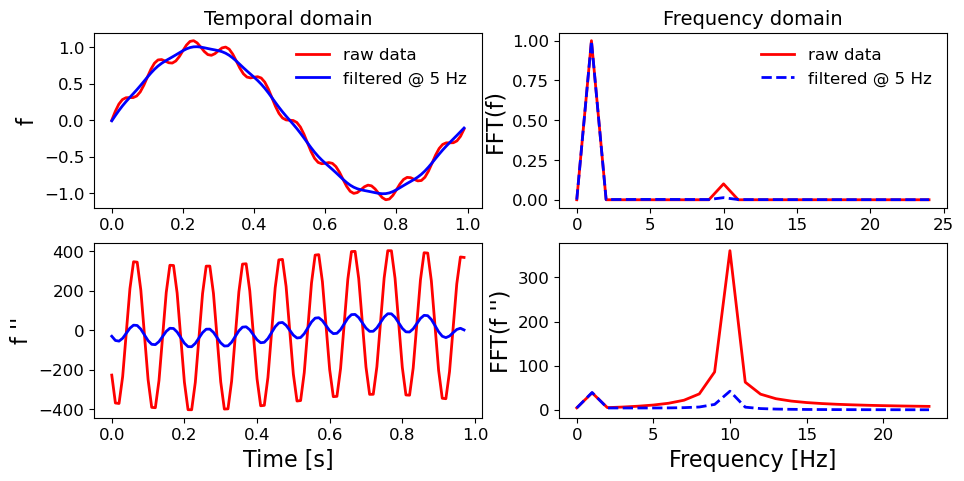

In [25]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(11, 5))

ax1.set_title('Temporal domain', fontsize=14)
ax1.plot(t, y, 'r', linewidth=2, label = 'raw data')
ax1.plot(t, y2, 'b', linewidth=2, label = 'filtered @ 5 Hz')
ax1.set_ylabel('f')
ax1.legend(frameon=False, fontsize=12)

ax2.set_title('Frequency domain', fontsize=14)
ax2.plot(freqs[:int(yfft.size/4)], yfft[:int(yfft.size/4)],'r',  linewidth=2,label='raw data')
ax2.plot(freqs[:int(yfft.size/4)],y2fft[:int(yfft.size/4)],'b--',linewidth=2,label='filtered @ 5 Hz')
ax2.set_ylabel('FFT(f)')
ax2.legend(frameon=False, fontsize=12)

ax3.plot(t[:-2], ydd, 'r', linewidth=2, label = 'raw')
ax3.plot(t[:-2], y2dd, 'b', linewidth=2, label = 'filtered @ 5 Hz')
ax3.set_xlabel('Time [s]')
ax3.set_ylabel("f ''")

ax4.plot(freqs[:int(yddfft.size/4)], yddfft[:int(yddfft.size/4)], 'r', linewidth=2, label = 'raw')
ax4.plot(freqs[:int(yddfft.size/4)],y2ddfft[:int(yddfft.size/4)],'b--',linewidth=2, label = 'filtered @ 5 Hz')
ax4.set_xlabel('Frequency [Hz]')
ax4.set_ylabel("FFT(f '')");

## Pezzack's benchmark data

In 1977, Pezzack, Norman and Winter published a paper where they investigated the effects of differentiation and filtering processes on experimental data (the angle of a bar manipulated in space). Since then, these data have became a benchmark to test new algorithms. Let's work with these data (available at [https://isbweb.org/data/pezzack/index.html](https://isbweb.org/data/pezzack/index.html)). The data have the angular displacement measured by video and the angular acceleration  directly measured by an accelerometer, which we will consider as the true acceleration.

In [26]:
data = pd.read_csv('https://raw.githubusercontent.com/BMClab/BMC/master/data/Pezzack.txt',
                   sep='\t', header=None, skiprows=6).to_numpy()
time, disp, disp2, aacc = data[:, 0], data[:, 1], data[:, 2], data[:, 3]

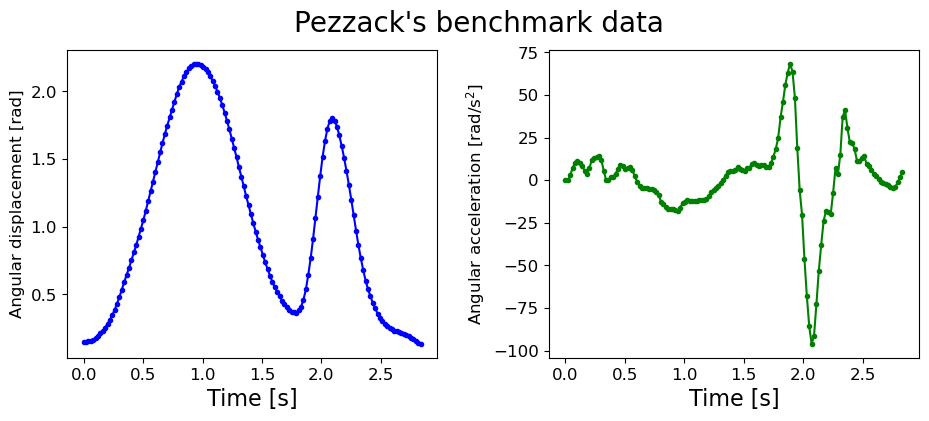

In [27]:
# load data file
dt = np.mean(np.diff(time))
# plot data
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(11, 4))
plt.suptitle("Pezzack's benchmark data", fontsize=20)
ax1.plot(time, disp, 'b.-')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Angular displacement [rad]', fontsize=12)
ax2.plot(time, aacc, 'g.-')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Angular acceleration [rad/s$^2$]', fontsize=12)
plt.subplots_adjust(wspace=0.3)

The challenge is how to obtain the acceleration using the disclacement data dealing with the noise.   
A simple double differentiation of these data will amplify the noise:

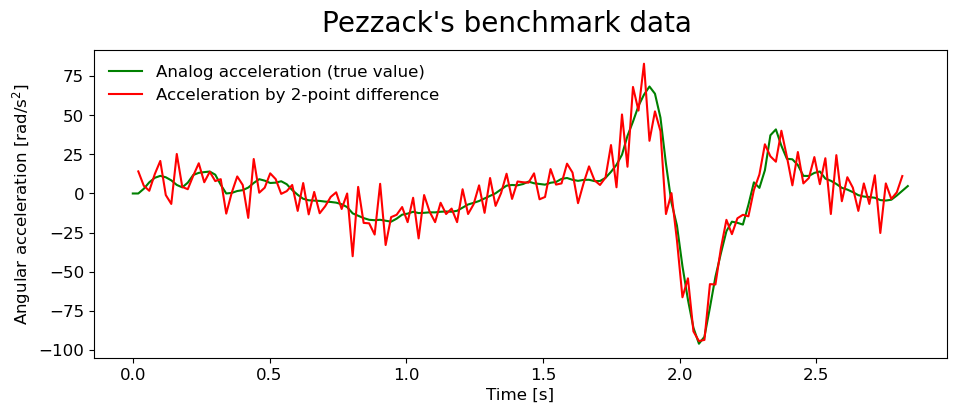

In [28]:
# acceleration using the 2-point forward difference algorithm:
aacc2 =  np.diff(disp, 2)/dt/dt # aacc2 has 2 points less than aacc
# plot data 
fig, ax1 = plt.subplots(1, 1, figsize=(11, 4))
plt.suptitle("Pezzack's benchmark data", fontsize=20)
ax1.plot(time, aacc, 'g', label='Analog acceleration (true value)')
ax1.plot(time[1:-1], aacc2, 'r', label='Acceleration by 2-point difference')
ax1.set_xlabel('Time [s]', fontsize=12)
ax1.set_ylabel('Angular acceleration [rad/s$^2$]', fontsize=12)
plt.legend(frameon=False, fontsize=12, loc='upper left');

The source of noise in these data is due to random small errors in the digitization process which occur at each frame, because that the frequency content of the noise is up to half of the sampling frequency, higher the frequency content of the movement being analyzed.   
Let's try different filters ([Butterworth](https://en.wikipedia.org/wiki/Butterworth_filter), [Savitzky-Golay](https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_smoothing_filter), and [spline](https://en.wikipedia.org/wiki/Spline_function)) to attenuate this noise.  

Both Savitzky-Golay and the spline functions are based on fitting polynomials to the data and they allow to differentiate the polynomials in order to get the derivatives of the data (instead of direct numerical differentiation of the data).  
The Savitzky-Golay and the spline functions have the following signatures:  
```python
savgol_filter(x, window_length, polyorder, deriv=0, delta=1.0, axis=-1, mode='interp', cval=0.0)    
splrep(x, y, w=None, xb=None, xe=None, k=3, task=0, s=None, t=None, full_output=0, per=0, quiet=1)
```
And to evaluate the spline derivatives:  
```python
splev(x, tck, der=0, ext=0)
```

And let's employ the [root-mean-square error (RMSE)](https://en.wikipedia.org/wiki/RMSE) metric to compare their performance:

In [29]:
from scipy import signal, interpolate

# Butterworth filter
# Correct the cutoff frequency for the number of passes in the filter
C = 0.802
b, a = signal.butter(2, (9/C)/((1/dt)/2))
dispBW = signal.filtfilt(b, a, disp)
aaccBW = np.diff(dispBW, 2)/dt/dt  # aaccBW has 2 points less than aacc

# Add (pad) data to the extremities to avoid problems with filtering
disp_pad = signal._arraytools.odd_ext(disp, n=11)
time_pad = signal._arraytools.odd_ext(time, n=11)

# Savitzky-Golay filter
aaccSG = signal.savgol_filter(disp_pad,window_length=5,polyorder=3,deriv=2,delta=dt)[11:-11]

# Spline smoothing
tck    = interpolate.splrep(time_pad, disp_pad, k=5, s=0.15*np.var(disp_pad)/np.size(disp_pad))
aaccSP = interpolate.splev(time_pad, tck, der=2)[11:-11]

# RMSE:
rmseBW = np.sqrt(np.mean((aaccBW-aacc[1:-1])**2))
rmseSG = np.sqrt(np.mean((aaccSG-aacc)**2))
rmseSP = np.sqrt(np.mean((aaccSP-aacc)**2))

And the plots:

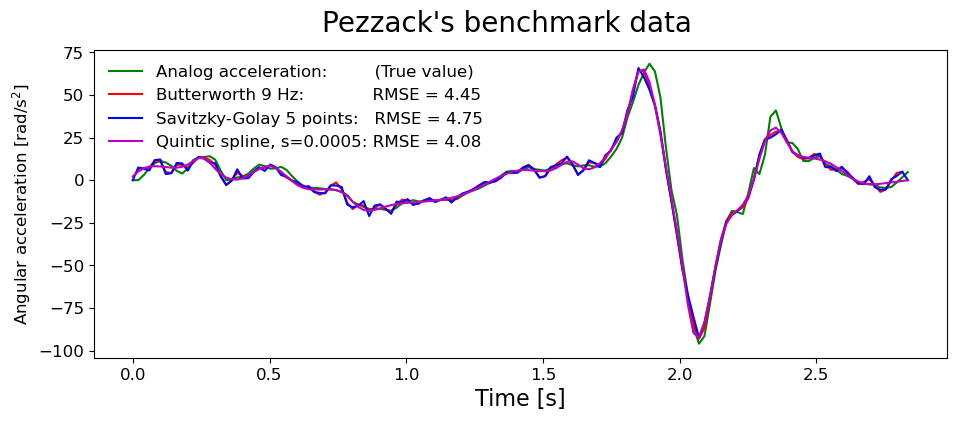

In [30]:
# plot data
fig, ax1 = plt.subplots(1, 1, figsize=(11, 4))
plt.suptitle("Pezzack's benchmark data", fontsize=20)
ax1.plot(time, aacc, 'g', label='Analog acceleration:         (True value)')
ax1.plot(time[1:-1], aaccBW, 'r', label='Butterworth 9 Hz:             RMSE = %0.2f' %rmseBW) 
ax1.plot(time,aaccSG,'b', label='Savitzky-Golay 5 points:   RMSE = %0.2f' %rmseSG)
ax1.plot(time,aaccSP,'m', label='Quintic spline, s=0.0005: RMSE = %0.2f' %rmseSP)
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Angular acceleration [rad/s$^2$]', fontsize=12)
plt.legend(frameon=False, fontsize=12, loc='upper left');

At this case, the Butterworth, Savitzky-Golay, and spline filters produced similar results with good fits to the original curve. However, with all of them, particularly with the spline smoothing, it is necessary some degree of tuning for choosing the right parameters. The Butterworth filter is the easiest one because the cutoff frequency choice sound more familiar for human movement analysis.

## Kinematics of a ball toss

Let's now analyse the kinematic data of a ball tossed to the space. These data were obtained using [Tracker](https://physlets.org/tracker/), which is a free video analysis and modeling tool built on the [Open Source Physics](https://www.compadre.org/osp/) (OSP) Java framework.   
The data are from the analysis of the video *balltossout.mov* from the mechanics video collection which can be obtained in the Tracker website. 

In [31]:
data = pd.read_csv('https://raw.githubusercontent.com/BMClab/BMC/master/data/balltoss.txt',
                   sep='\t', header=None, skiprows=2).to_numpy()
t, x, y = data[:, 0], data[:, 1], data[:, 2]
dt = np.mean(np.diff(t))
print('Time interval: %f s' %dt)
print('x and y values:')
x, y

Time interval: 0.033333 s
x and y values:


(array([-0.5261959 , -0.47022949, -0.41424847, -0.35758601, -0.3014982 ,
        -0.24478176, -0.18752785, -0.13093786, -0.07289294, -0.01740141,
         0.03954446,  0.09656871,  0.15395135,  0.21139876,  0.26890565,
         0.32733887,  0.38568062,  0.44373606,  0.50262023,  0.56204422,
         0.62228805,  0.68445434]),
 array([-0.0022779 ,  0.08077725,  0.15225886,  0.21303943,  0.26297201,
         0.30213759,  0.33099039,  0.34843908,  0.35535308,  0.35101924,
         0.33603197,  0.30988308,  0.27205718,  0.22409941,  0.16461168,
         0.09366908,  0.0122238 , -0.08179336, -0.1863157 , -0.30312601,
        -0.43167532, -0.5731189 ]))

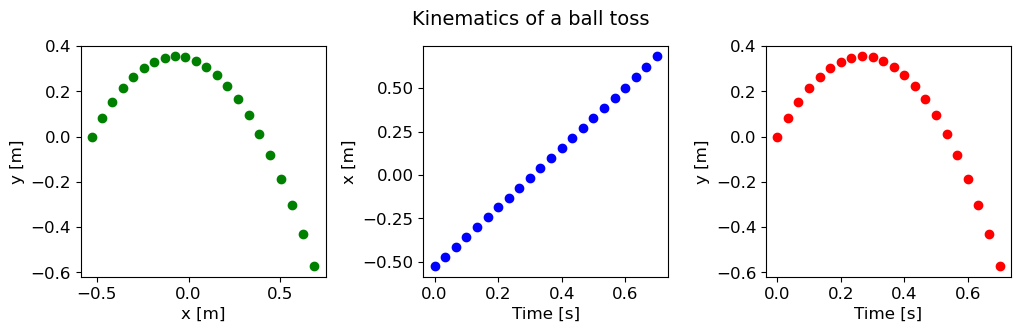

In [32]:
plt.rc('axes',  labelsize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(12, 3))
plt.suptitle('Kinematics of a ball toss', fontsize=14, y=1)
ax1.plot(x, y, 'go')
ax1.set_ylabel('y [m]')
ax1.set_xlabel('x [m]')
ax2.plot(t, x, 'bo')
ax2.set_ylabel('x [m]')
ax2.set_xlabel('Time [s]')
ax3.plot(t, y, 'ro')
ax3.set_ylabel('y [m]')
ax3.set_xlabel('Time [s]')
plt.subplots_adjust(wspace=0.4)

Calculate the velocity and acceleration numerically:

In [33]:
# forward difference algorithm:
vx, vy = np.diff(x)/dt,  np.diff(y)/dt
ax, ay = np.diff(vx)/dt, np.diff(vy)/dt
# central difference algorithm:
vx2, vy2 = (x[2:]-x[:-2])/(2*dt),     (y[2:]-y[:-2])/(2*dt)
ax2, ay2 = (vx2[2:]-vx2[:-2])/(2*dt), (vy2[2:]-vy2[:-2])/(2*dt)

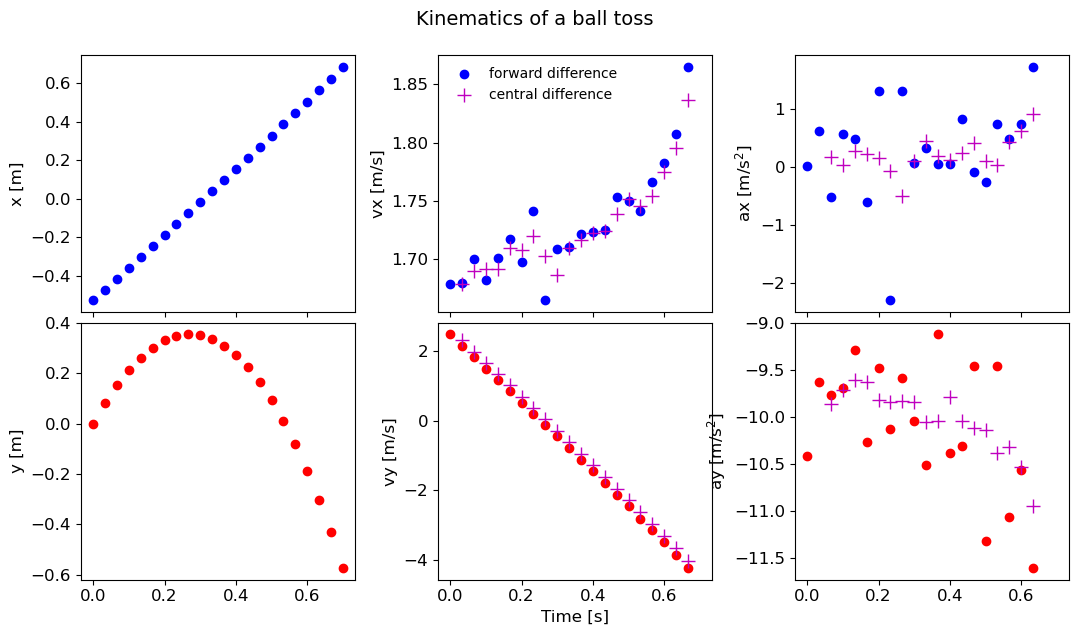

In [34]:
fig, axarr = plt.subplots(2, 3, sharex = True, figsize=(11, 6))
axarr[0,0].plot(t, x, 'bo')
axarr[0,0].set_ylabel('x [m]')
axarr[0,1].plot(t[:-1], vx, 'bo', label='forward difference'); axarr[0,1].set_ylabel('vx [m/s]')
axarr[0,1].plot(t[1:-1], vx2, 'm+', markersize=10, label='central difference')
axarr[0,1].legend(frameon=False, fontsize=10, loc='upper left', numpoints=1)
axarr[0,2].plot(t[:-2], ax, 'bo')
axarr[0,2].set_ylabel('ax [m/s$^2$]')
axarr[0,2].plot(t[2:-2], ax2, 'm+', markersize=10)
axarr[1,0].plot(t, y, 'ro')
axarr[1,0].set_ylabel('y [m]')
axarr[1,1].plot(t[:-1], vy, 'ro')
axarr[1,1].set_ylabel('vy [m/s]')
axarr[1,1].plot(t[1:-1], vy2, 'm+', markersize=10)
axarr[1,2].plot(t[:-2], ay, 'ro')
axarr[1,2].set_ylabel('ay [m/s$^2$]')
axarr[1,2].plot(t[2:-2], ay2, 'm+', markersize=10)
axarr[1,1].set_xlabel('Time [s]')
plt.tight_layout(w_pad=-.5, h_pad=0)
plt.suptitle('Kinematics of a ball toss', fontsize=14, y=1.05);

We can observe the noise, particularly in the derivatives of the data. For example, the vertical acceleration of the ball should be constant, approximately g=9.8 m/s$^2$.   
To estimate the acceleration, we can get rid off the noise by filtering the data or, because we know the physics of the phenomenon, we can fit a model to the data. Let's try the latter option.

In [35]:
# Model: y = y0 + v0*t + 1/2*g*t^2
# fit a second order polynomial to the data
p = np.polyfit(t, y, 2)
print('g = %0.2f m/s2' % (2*p[0]))

g = -9.98 m/s2


A good estimation but is seems there is a problem with the video because the acceleration at the end seems to increase (see figure above); maybe there is a distortion in the video at its extremity.

To read more about fitting a model to data (in this case a mathematical equation), read the text [curve fitting](http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/CurveFitting.ipynb). 

## The optimal cutoff frequency

Probably after reading this tutorial you are wondering how to automatically determine the optimal cutoff frequency that should be employed in a low-pass filter to attenuate as much as possible the noise without compromising the signal content in the data.   
This is an important topic in signal processing, particularly in movement science, and we discuss one method for that in the text [Residual analysis to determine the optimal cutoff frequency](https://nbviewer.org/github/BMClab/BMC/blob/master/notebooks/ResidualAnalysis.ipynb).

## References

- David A. Winter (2009) [Biomechanics and motor control of human movement](http://books.google.com.br/books?id=_bFHL08IWfwC). 4th edition. Hoboken: Wiley. 
- [dspGuru - Digital Signal Processing Central](http://www.dspguru.com/).
- Gordon Robertson, Graham Caldwell, Joseph Hamill, Gary Kamen (2013) [Research Methods in Biomechanics](http://books.google.com.br/books?id=gRn8AAAAQBAJ). 2nd Edition. Human Kinetics.  
- Pezzack JC, Norman RW, & Winter DA (1977). [An assessment of derivative determining techniques used for motion analysis](http://www.health.uottawa.ca/biomech/courses/apa7305/JB-Pezzack-Norman-Winter-1977.pdf). Journal of Biomechanics, 10, 377-382. [PubMed](http://www.ncbi.nlm.nih.gov/pubmed/893476).
- Richard G. Lyons (2010) [Understanding Digital Signal Processing](http://books.google.com.br/books?id=UBU7Y2tpwWUC&hl). 3rd edition. Prentice Hall.  
- Robertson DG, Dowling JJ (2003) [Design and responses of Butterworth and critically damped digital filters](https://www.ncbi.nlm.nih.gov/pubmed/14573371). J Electromyogr Kinesiol. 13(6), 569-573.